Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg)

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$}
$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

## Задание

* Оценить  ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8
* Обосновать численно и графически стационарность
* Построить график распределеиня $n(\xi)$

Вспомогательная функция для раскраски вершин графа в соответствии с переданной маской:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [value(current)]
    for i in range(niter): 
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:            
            current = proposed
        post.append(value(current))
    return post[nburn:]

In [3]:
def value(graph, **kwargs):
    return np.sum(nstart)

def point_is_good(xy, graph):
    graph = np.pad(graph,1)
    x, y = xy[0] + 1, xy[1] + 1 
    neighbours = graph[np.ix_([x-1,x,x+1],[y-1,y,y+1])]
    neighbours=np.append(neighbours[1,::2], neighbours[::2,1])
    return not (True in neighbours) #no black neighbours -- gut!

def proposal(current_graph, **kwargs):
    x,y = np.random.randint(0,8,2)
    new_graph = current_graph
    
    if point_is_good((x,y), current_graph):
        if new_graph[x,y] == True:
            new_graph[x,y] = False
        else:
            new_graph[x,y] = True
    else:
        if new_graph[x,y] == True:
            new_graph[x,y] = False
    return new_graph

In [4]:
size=8
niters=50

In [5]:
nstart=np.zeros(size*size).reshape((size, size)).astype('bool')
nstart[np.random.randint(8),np.random.randint(8)] = True
nstart

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

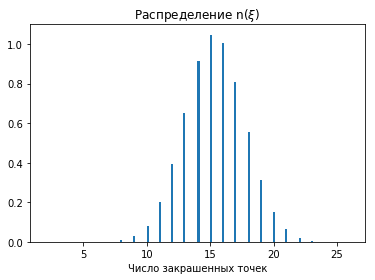

In [6]:
post = metroplis(nstart, value, proposal, niter=350_000, nburn=1)
vals=[np.sum(i) for i in post]
plt.title(r'Распределение n($\xi$)')
plt.xlabel('Число закрашенных точек')
plt.hist(vals, bins=150, density=True, label='MCMC graph nods')
plt.show()

In [7]:
from scipy import stats

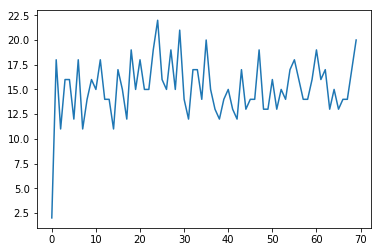

In [28]:
plt.plot(vals[::5000])

In [9]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

In [27]:
g_test(vals[::5000])

Ttest_indResult(statistic=-0.8261364391702751, pvalue=0.43854977173678733)